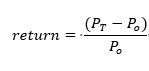

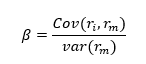

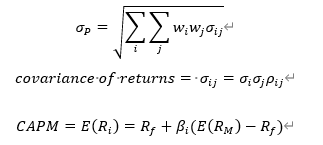

I have a stock price dataset obtained from yfinanace containing FTSE 100 stock prices from 2021-2022.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/HKBU-DavidLo/stock_analysis/master/data/ftse100stocks.csv'
df = pd.read_csv(data_url, index_col='Date', parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2021-01-04,77.599998,78.199997,74.400002,74.400002,69.165916,1496738.0,AAF
2021-01-05,76.599998,77.599998,74.400002,77.599998,72.140793,2198045.0,AAF
2021-01-06,78.500000,80.300003,76.599998,80.300003,74.650856,3017284.0,AAF
2021-01-07,82.500000,82.500000,79.400002,79.699997,74.093056,1473496.0,AAF
2021-01-08,83.400002,83.400002,77.860001,78.199997,72.698578,1579485.0,AAF


In [4]:
df['Name'].unique()

array(['AAF', 'AAL', 'ABDN', 'ABF', 'ADM', 'AHT', 'ANTO', 'AUTO', 'AV',
       'AZN', 'BA', 'BARC', 'BATS', 'BDEV', 'BEZ', 'BKG', 'BLND', 'BME',
       'BNZL', 'BP', 'BRBY', 'BT-A', 'CCH', 'CNA', 'CPG', 'CRDA', 'CRH',
       'CTEC', 'DCC', 'DGE', 'EDV', 'ENT', 'EXPN', 'FCIT', 'FLTR', 'FRAS',
       'FRES', 'GLEN', 'GSK', 'HL', 'HLMA', 'HLN', 'HSBA', 'HSX', 'IAG',
       'IHG', 'III', 'IMB', 'INF', 'ITRK', 'JD', 'JMAT', 'KGF', 'LAND',
       'LGEN', 'LLOY', 'LSEG', 'MNDI', 'MNG', 'MRO', 'NG', 'NWG', 'NXT',
       'OCDO', 'PHNX', 'PRU', 'PSH', 'PSN', 'PSON', 'REL', 'RIO', 'RKT',
       'RMV', 'RR', 'RS1', 'RTO', 'SBRY', 'SDR', 'SGE', 'SGRO', 'SHEL',
       'SKG', 'SMDS', 'SMIN', 'SMT', 'SN', 'SPX', 'SSE', 'STAN', 'STJ',
       'SVT', 'TSCO', 'TW', 'ULVR', 'UTG', 'UU', 'VOD', 'WEIR', 'WPP'],
      dtype=object)

In [5]:
# select a few stocks as my portfolio (random, not a real portfolio)
portfolio = ['GLEN', 'PSN', 'BP', 'UU', 'STAN']

Reconstruct a dataset with closing prices in 2022 of the stocks in the portfolio, with the format as follows:

|Date| LLOY | VOD | BP | BT-A | TW |

In [6]:
# to have all unique dates in 2022 to be in the dataset as the index column
all_dates = df.index.unique().sort_values()

In [7]:
len(all_dates)

523

In [8]:
all_dates.get_loc('2022-01-04') # first trading date in 2022

253

In [9]:
all_dates.get_loc('2022-12-30') # last trading date in 2022

502

In [10]:
start = all_dates.get_loc('2022-01-04')
end = all_dates.get_loc('2022-12-30')
dates = all_dates[start: end+1]

In [11]:
len(dates) # no. of trading days in 2022

250

In [12]:
# create empty dataset with the index to be the target dates
close_prices = pd.DataFrame(index=dates)

In [13]:
# rearrange the rwos in the df so that close_prices will have the columns of
# closing prices of the portfolio stock next to the date index column
for stock in portfolio:
  df_sym = df[df['Name']==stock]
  df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[stock])
  close_prices = close_prices.join(df_tmp)

In [14]:
close_prices.head()

,GLEN,PSN,BP,UU,STAN
Date,,,,,
2022-01-04,387.649994,2883.0,351.000000,1091.5,462.799988
2022-01-05,393.000000,2877.0,354.799988,1083.0,460.200012
2022-01-06,388.350006,2800.0,355.149994,1072.5,477.299988
2022-01-07,395.350006,2794.0,362.549988,1068.0,487.000000
2022-01-10,388.950012,2650.0,363.049988,1055.0,492.500000


After the dataset of closing prices are made, second task is to handle the missing values by forward filling and backward filling

In [15]:
close_prices.isna().sum()

GLEN    2
PSN     0
BP      3
UU      0
STAN    0
dtype: int64

In [16]:
close_prices[close_prices['GLEN'].isna()]

,GLEN,PSN,BP,UU,STAN
Date,,,,,
2022-03-10,NaN,2120.0,NaN,1073.0,489.600006
2022-04-25,NaN,2194.0,368.850006,1132.5,497.299988


In [17]:
close_prices[close_prices['BP'].isna()]

,GLEN,PSN,BP,UU,STAN
Date,,,,,
2022-01-11,387.799988,2680.0,NaN,1049.5,492.799988
2022-03-10,NaN,2120.0,NaN,1073.0,489.600006
2022-05-18,498.200012,2116.0,NaN,1144.5,596.400024


In [18]:
close_prices.fillna(method='ffill', inplace=True)

In [19]:
close_prices.isna().sum().sum()

0

Then I have to calculate the **daily** returns of each of the stocks by creating a new dataset named "returns", with the index column as the trading date (excluding the first trading date since no return can be calculated on that day)

In [20]:
returns = pd.DataFrame(index=dates[1:])
returns.head()

""
Date
2022-01-05
2022-01-06
2022-01-07
2022-01-10
2022-01-11


In [21]:
for stock in portfolio:
  daily_return = close_prices[stock].pct_change()
  returns[stock] = daily_return.iloc[1:] * 100

In [22]:
returns.head()

,GLEN,PSN,BP,UU,STAN
Date,,,,,
2022-01-05,1.380113,-0.208117,1.082618,-0.778745,-0.561792
2022-01-06,-1.183205,-2.676399,0.098649,-0.969529,3.715770
2022-01-07,1.802498,-0.214286,2.083625,-0.419580,2.032267
2022-01-10,-1.618817,-5.153901,0.137912,-1.217228,1.129363
2022-01-11,-0.295674,1.132075,0.000000,-0.521327,0.060911


In [23]:
mean_return = returns.mean()
mean_return

GLEN    0.170679
PSN    -0.314584
BP      0.145394
UU     -0.024757
STAN    0.148498
dtype: float64

In [24]:
var = returns.var()
var

GLEN    5.657459
PSN     6.156697
BP      4.787629
UU      2.755930
STAN    5.948523
dtype: float64

In [25]:
cov = returns.cov()
cov

,GLEN,PSN,BP,UU,STAN
GLEN,5.657459,1.065264,2.555279,0.066008,1.986433
PSN,1.065264,6.156697,0.612274,1.206095,1.389055
BP,2.555279,0.612274,4.787629,0.013316,2.514048
UU,0.066008,1.206095,0.013316,2.755930,0.283242
STAN,1.986433,1.389055,2.514048,0.283242,5.948523


In [26]:
cov_np = cov.to_numpy()

# Equally-weighted portfolio

In [27]:
D = len(portfolio)
D

5

In [28]:
weights = np.array([1/D] * D)
weights 

array([0.2, 0.2, 0.2, 0.2, 0.2])

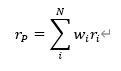

In [29]:
# portfolio expected return
portfolio_er = weights.dot(mean_return)
portfolio_er

0.02504606800509386

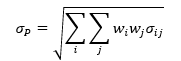

In [30]:
# portfolio standard deviation
portfolio_sd = np.sqrt(np.transpose(weights).dot(cov_np).dot(weights))
portfolio_sd

1.3955395787396454

# Optimal Risk Portfolio

In [31]:
from scipy.optimize import linprog

In [32]:
A_eq = np.ones((1, D))
b_eq = np.ones(1)
bounds = [(0, None)] * D
bounds

[(0, None), (0, None), (0, None), (0, None), (0, None)]

In [33]:
mean_return

GLEN    0.170679
PSN    -0.314584
BP      0.145394
UU     -0.024757
STAN    0.148498
dtype: float64

In [34]:
# minimize
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

     con: array([-7.8618223e-11])
     fun: -0.31458407255701204
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2.51383429e-11, 1.00000000e+00, 2.69058237e-11, 7.37466078e-13,
       2.66697269e-11])

In [35]:
min_return = res.fun

In [36]:
res = linprog(-mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res

     con: array([-8.38529246e-12])
     fun: -0.17067898472730575
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([1.00000000e+00, 1.95368175e-12, 3.34744013e-11, 4.33142773e-12,
       4.16192810e-11])

In [37]:
max_return = -res.fun

In [49]:
min_return, max_return

(-0.31458407255701204, 0.17067898472730575)

In [39]:
N = 100
target_returns = np.linspace(min_return, max_return, num=N)

In [40]:
from scipy.optimize import minimize

In [41]:
def get_variance(weights):
  return weights.dot(cov).dot(weights)

In [42]:
def target_return_constraint(weights, target):
  return weights.dot(mean_return) - target

In [43]:
def portfolio_constraint(weights):
  return weights.sum() - 1

In [44]:
constraints = [
    {
        'type': 'eq',
        'fun': target_return_constraint,
        'args': [target_returns[0]]
    },
    {
        'type': 'eq', 
        'fun': portfolio_constraint,
    }
]

In [45]:
# without bounds
res = minimize(
    fun=get_variance,
    x0 = np.ones(D) / D,
    method='SLSQP',
    constraints=constraints,
)
res

     fun: 5.291502051218572
     jac: array([-0.24210852, 10.58300424,  0.32193547,  4.11762524,  0.252693  ])
 message: 'Optimization terminated successfully'
    nfev: 52
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([-0.17053285,  0.84080337,  0.11320305,  0.40164541, -0.18511899])

In [46]:
np.dot(res.x, mean_return)

-0.3145840725596498

In [47]:
# with bounds
res = minimize(
    fun=get_variance,
    x0 = np.ones(D) / D,
    method='SLSQP',
    constraints=constraints,
    bounds=bounds,
)
res

     fun: 6.156696665839209
     jac: array([ 2.13052803, 12.31339347,  1.22454816,  2.41218954,  2.77811038])
 message: 'Optimization terminated successfully'
    nfev: 19
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.00000000e+00, 9.99999998e-01, 2.66453526e-15, 1.67792923e-09,
       0.00000000e+00])

In [48]:
np.dot(res.x, mean_return)

-0.31458407208311

In [50]:
optimized_risks = []
for target in target_returns:
  constraints[0]['args'] = [target]
  res = minimize(
      fun = get_variance,
      x0 = np.ones(D)/D,
      method='SLSQP',
      constraints = constraints,
      bounds=bounds
  )
  optimized_risks.append(np.sqrt(res.fun))
  if res.status != 0:
    print(res)

In [51]:
mv_risk = np.sqrt(res.fun)
mv_weights = res.x
mv_ret = mv_weights.dot(mean_return)

In [53]:
N = 10000
D = len(mean_return)
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  rand_range = 1.0
  w = np.random.random(D) * rand_range - rand_range / 2
  w[-1] = 1 - w[:-1].sum()
  np.random.shuffle(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov_np).dot(w))
  returns[i] = ret
  risks[i] = risk

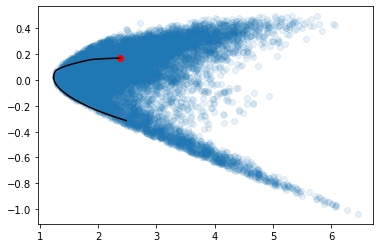

In [54]:
plt.scatter(risks, returns, alpha=.1);
plt.plot(optimized_risks, target_returns, c='black');
plt.scatter([mv_risk], [mv_ret], c='red');